In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('Z:\\Descargas\\resampled_2d_data.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,0,1,2,3,4,5,6,7,8,9,...,4151,4152,4153,4154,4155,4156,4157,4158,4159,4160
0,6.614961e-07,7.224065e-07,7.645448e-07,8.424514e-07,9.071635e-07,0.000001,0.000001,0.000001,0.000001,0.000002,...,12553.078210,12901.276208,13321.115403,13761.898144,14607.698694,15746.935076,17579.265073,19665.153021,21421.370752,1.0
1,6.647588e-07,7.183607e-07,7.698426e-07,8.380359e-07,9.163567e-07,0.000001,0.000001,0.000001,0.000001,0.000002,...,13705.329113,14312.677104,14742.126975,15304.330735,16796.156544,17774.778293,19645.234724,21684.552619,23459.480135,0.0
2,6.661935e-07,7.176343e-07,7.266433e-07,8.441123e-07,1.093127e-06,0.000001,0.000001,0.000001,0.000001,0.000001,...,14856.805797,14129.780744,14022.373255,14851.210637,15911.858243,15817.607967,16690.049145,16678.342992,19406.529559,1.0
3,6.475322e-07,7.268198e-07,7.752151e-07,8.410999e-07,9.713247e-07,0.000001,0.000001,0.000001,0.000001,0.000002,...,18914.810292,19524.354971,20407.341492,21146.548885,22874.118492,23947.304881,27400.679019,28370.406666,30643.370988,0.0
4,6.420032e-07,7.247817e-07,7.898901e-07,8.305194e-07,1.031578e-06,0.000001,0.000001,0.000002,0.000002,0.000002,...,26522.866400,25942.040576,26738.595695,26007.196219,26962.912544,26137.403942,27205.068999,26431.598330,28178.330171,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10009,6.922688e-07,7.108306e-07,8.896599e-07,1.306082e-06,1.326371e-06,0.000001,0.000001,0.000002,0.000002,0.000002,...,48578.130965,48251.389462,48809.084932,48325.047759,49103.026581,48438.658562,49440.096109,48370.334138,50570.913488,1.0
10010,6.393816e-07,7.245298e-07,8.030158e-07,8.384690e-07,1.117636e-06,0.000001,0.000001,0.000002,0.000002,0.000002,...,80696.157721,80210.860624,81321.537436,80549.500485,81951.901420,80851.778560,82666.765265,80833.894463,85231.882925,1.0
10011,6.496972e-07,7.183055e-07,8.016158e-07,8.252273e-07,1.072643e-06,0.000001,0.000001,0.000002,0.000002,0.000002,...,39533.235066,39570.337494,40378.152974,40239.727417,41252.985237,41277.353658,42726.415494,42750.589054,46205.071834,1.0
10012,6.520515e-07,7.151904e-07,8.061395e-07,8.229159e-07,1.084932e-06,0.000001,0.000001,0.000002,0.000002,0.000002,...,39518.971272,39575.533277,40428.084674,40265.668766,41296.576676,41298.528704,42778.656529,42758.270181,46286.460131,1.0


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, stratify=y)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)

print("Train F1 score: " + str(f1_score(clf.predict(X_train), y_train)))
print("Test F1 score: " + str(f1_score(clf.predict(X_test), y_test)))

Train F1 score: 1.0
Test F1 score: 0.8222354340071343


# Data Preparation For Novelty Anomaly Detection in Time Series Data

In [3]:
df = df.rename(columns={'4160':'target'})

# Divide dataframe depending on target
df_correct = df.loc[df['target'] == 1]
df_incorrect = df.loc[df['target'] == 0]

df_train, df_test_correct = train_test_split(df_correct, test_size=0.2, random_state=0)
df_test_incorrect = df_incorrect

X_train = df_train.iloc[:,:-1]
X_test_correct = df_test_correct.iloc[:,:-1]
X_test_incorrect = df_test_incorrect.iloc[:,:-1]

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test_correct = scaler.transform(X_test_correct)
X_test_incorrect = scaler.transform(X_test_incorrect)

# PCA

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9).fit(X_train)
pca.transform(X_train)

array([[ -0.96129918,   5.66788189, -11.52105367,   1.1858143 ,
         -4.65982062],
       [ -1.17481543,   3.02680679,  -9.54282661,   2.29922696,
         -5.81686524],
       [ -1.20542563,  -9.46878708,  -9.44600821,   6.7870039 ,
         -7.47528211],
       ...,
       [ -1.33950525,  38.98058987,  39.04180675,  58.94162761,
         16.70110717],
       [ -0.54634064,  -2.6986748 ,  -7.34006388,   5.2721245 ,
          6.02933341],
       [ -0.96694002, -48.16209756,  45.49579166,  -7.02108119,
         43.9945358 ]])

In [7]:
import numpy as np
from sklearn.decomposition import PCA
from models.model import ReconstructionErrorModel

# Fit reconstruction error model with correct data
model = ReconstructionErrorModel(X_train, model=PCA(n_components=0.9))

# Calculate anomaly threshold with correct data
train_errors = model.predict(X_train)
threshold = np.mean(train_errors) + (np.std(train_errors) * 3)

# Print principal components
print(threshold)
print('%i Principal Components' % len(model.get_model().explained_variance_))

0.8996983851830147
5 Principal Components


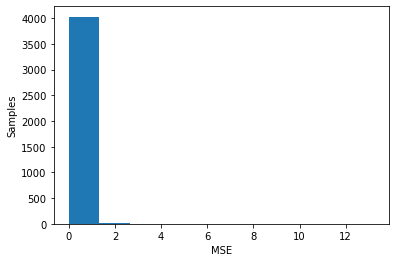

In [8]:
import matplotlib.pyplot as plt

plt.hist(model.predict(X_train))
plt.xlabel('MSE')
plt.ylabel('Samples')
plt.show()

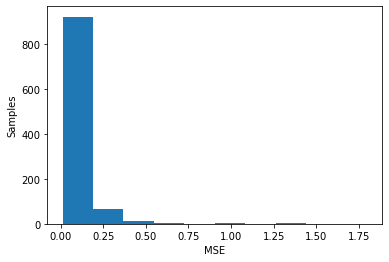

In [9]:
import matplotlib.pyplot as plt

plt.hist(model.predict(X_test_correct))
plt.xlabel('MSE')
plt.ylabel('Samples')
plt.show()

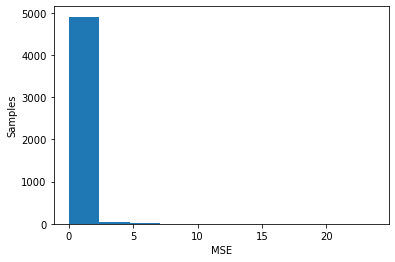

In [10]:
import matplotlib.pyplot as plt

plt.hist(model.predict(X_test_incorrect))
plt.xlabel('MSE')
plt.ylabel('Samples')
plt.show()

In [11]:
# Calculate how many train instances are detected as anomalies
errors = model.predict(X_train)
anomalies = np.where(errors > threshold)[0]
print('Anomalies with train data %s' % str(len(anomalies)))

# Calculate how many test correct instances are detected as anomalies
errors = model.predict(X_test_correct)
anomalies = np.where(errors > threshold)[0]
print('Anomalies with test correct data %s' % str(len(anomalies)))

# Calculate how many test incorrect instances are detected as anomalies
errors = model.predict(X_test_incorrect)
anomalies = np.where(errors > threshold)[0]
print('Anomalies with test incorrect data %s' % str(len(anomalies)))

Anomalies with train data 25
Anomalies with test correct data 7
Anomalies with test incorrect data 139
